# ANOVA - Analysis of Variance
Today, we will be learning ANOVA, a generalized form of comparing mean across multiple groups. 
Agenda today:
- Compare t-tests and ANOVA
- Learn to calculate ANOVA & details 
- Implement ANOVA in python
    - using statsmodel


## Part I. T tests or ANOVA?
**ANOVA** or *Analysis Of Variance*  provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

Suppose we want to compare whether multiple groups differ in some type of measures. For example, we have collected mood data grouped by four types of weather - sunny, raining, overcast, or cloudy, and we want to find out whether there is a difference in mood across different weather. What tests would you use?

A natural reaction would be to conduct multiple t-tests. However, that comes with many drawbacks. First, you would need $\frac{n(n-1)}{2}$ t tests, which come out to 6 tests. Having more tests meaning having higher chance of making type I error. In this case, our original probability of making type I error grew from 5% to 5% x 6 = 30%! By conduct 6 tests and comparing their mean to each other, we are running a huge risk of making false positives. How then, can we combat this? -- ANOVA!

Instead of looking at each individual difference, ANOVA examines the ratio of variance between groups, and variance within groups, and find out whether the ratio is big enough to be statistically significant. 

#### T Test statistics 
$t = \frac{x\bar - \mu}{\frac{s}{\sqrt n}}$


We can also say that t test is a special case of ANOVA in that we are comparing the means of only two groups.


#### ANOVA - the F test
$F = \frac{MS_{bet}}{MS_{within}}$

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image046.png" width="500">

#### Between Group Variability

Measures how much the means of each group vary from the mean of the overall population



<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image0171.png" width="500">
    

#### Within Group Variability

Refers to variations caused by differences within individual groups.  

Consider the given distributions of three samples below. As the spread (variability) of each sample is increased, their distributions overlap and they become part of a big population.
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image031.png" width="500">

Now consider another distribution of the same three samples but with less variability. Although the means of samples are similar to the samples in the above image, they seem to belong to different populations.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image033.png" width="500">


## Part II. Calculating ANOVA 
In this section, we will learn how to calculate ANOVA without using any pacakges. All we need to calculate is:

- $SS_b$ = $n\sum(\bar X - \bar X_i)^2 $

- $SS_w$ = $\sum (n_i - 1) s_i ^ 2$

- $SS_t$ = $\sum (X_ij - \bar X)^2$

- $MS_b$ = $\frac{SS_b}{DF_b}$

- $MS_w$ = $\frac{SS_w}{DF_w}$

- $F$ = $\frac{MS_b}{MS_w}$

Degrees of Freedom for ANOVA:
-  $DF_{between}$ = k - 1
- $DF_{within}$ = N - k
- $DF_{total}$ = N - 1

Notations:
- k is the number of groups
- N is the total number of observations
- n is the number of observations in each group

Like regression and t-test, we can also perform hypothesis testing with ANOVA. 

- $H_0$ : $\mu{_1}$ = $\mu_1$ = $\mu_3$ = $\mu_4$
- $H_a$ : $H_0$ is not true

Under the null hypothesis (and with certain assumptions), both quantities estimate the variance of the random error, and thus the ratio should be close to 1. If the ratio is large, then we have evidence against the null, and hence, we would reject the null hypothesis.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv('bikeshare_day.csv')
data.head()
# cnt is the outcome we are trying to predict

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


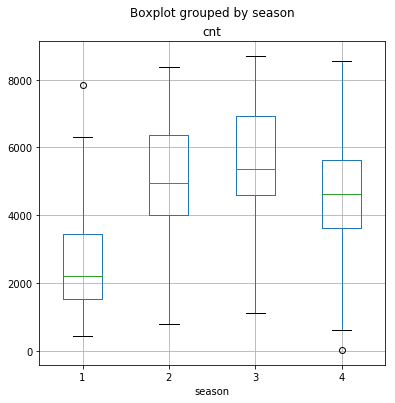

In [2]:
#Create a boxplot
# 1 is spring, 2 is summer, 3 is fall, and 4 is winter
data.boxplot('cnt', by='season', figsize=(6,6))

### 2.2 Calculate ANOVA using statsmodel

In [3]:
# we need to conduct a little bit feature engineering to encode 
data['season_cat'] = data.season.apply(lambda x: 'spring' if x == 1 else ('summer' if x == 2 else ('fall' if x ==3 else 'winter')))

In [4]:
data.season_cat

0      spring
1      spring
2      spring
3      spring
4      spring
5      spring
6      spring
7      spring
8      spring
9      spring
10     spring
11     spring
12     spring
13     spring
14     spring
15     spring
16     spring
17     spring
18     spring
19     spring
20     spring
21     spring
22     spring
23     spring
24     spring
25     spring
26     spring
27     spring
28     spring
29     spring
        ...  
701    winter
702    winter
703    winter
704    winter
705    winter
706    winter
707    winter
708    winter
709    winter
710    winter
711    winter
712    winter
713    winter
714    winter
715    winter
716    winter
717    winter
718    winter
719    winter
720    spring
721    spring
722    spring
723    spring
724    spring
725    spring
726    spring
727    spring
728    spring
729    spring
730    spring
Name: season_cat, Length: 731, dtype: object

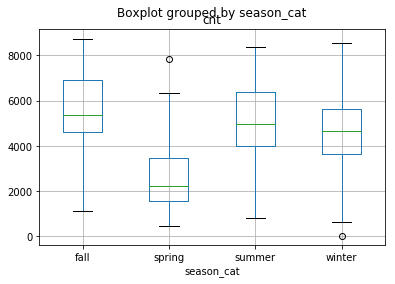

In [5]:
data.boxplot('cnt', by = 'season_cat')

In [6]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# why can we use ols in this case?
anova_season = ols('cnt~season_cat',data=data).fit()
# anova_season.summary()

In [7]:
# examine the anova table 
anova_table = sm.stats.anova_lm(anova_season, type=2)
print(anova_table)

               df        sum_sq       mean_sq           F        PR(>F)
season_cat    3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual    727.0  1.788940e+09  2.460715e+06         NaN           NaN


<img src="attachment:Screen%20Shot%202019-06-03%20at%2010.36.09%20AM.png" width="400">

In [17]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_cat'],
      dtype='object')

## Perform an ANOVA with scipy

In [18]:
stats.f_oneway(data['cnt'][data['season_cat'] == 'summer'],
                data['cnt'][data['season_cat'] == 'fall'], 
                data['cnt'][data['season_cat'] == 'winter'],
                data['cnt'][data['season_cat'] == 'spring'])

F_onewayResult(statistic=128.76962156570784, pvalue=6.720391362913176e-67)

#### Next steps
Just because we have rejected the null hypothesis, it doesn't mean we have conclusively showed which group is significantly different from which - remember, the alternative hypothesis is "the null is not true". 

We need to conduct post hoc tests for multiple comparison to find out which groups are different, the most prominent post hoc tests are:
- LSD (Least significant difference)
    - $t\sqrt \frac{MSE}{n^2}$
- Tukey's HSD 
    - $q\sqrt \frac{MSE}{n}$
    
After calculating a value for LSD or HSD, we compare each pair wise mean difference with the LSD or HSD difference. If the pairwise mean difference exceeds the LSD/HSD, then they are significantly different.

## Two-Way ANOVA:
Using one-way ANOVA, we found out that the season was impactful on the mood of different people. What if the season was to affect different groups of people differently? Say maybe older people were affected more by the seasons than younger people.

Moreover, how can we be sure as to which factor(s) is affecting the mood more? Maybe the age group is a more dominant factor responsible for a person's mode than the season.

For such cases, when the outcome or dependent variable (in our case the test scores) is affected by two independent variables/factors we use a slightly modified technique called two-way ANOVA.

### Resources

https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/
    
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/before-you-start/overview/

### $\chi^2$ Test with scipy

In [8]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [9]:
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)

[[10, 20, 30], [6, 9, 17]]


In [10]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


In [11]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

In [12]:
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)


In [13]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.873
Independent (fail to reject H0)


### Looking back at our bike share data. Can you identify an opportunity to use a chi-squared test?

In [15]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,spring
